# Import data


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
df = pd.read_csv("/content/drive/MyDrive/excel/Tweets.csv")

In [45]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


#Data exploration


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [47]:
df.describe().round(2)

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.00,10522.00,14640.00
mean,5.692184e+17,0.90,0.64,0.08
std,7.791112e+14,0.16,0.33,0.75
min,5.675883e+17,0.34,0.00,0.00
25%,5.685592e+17,0.69,0.36,0.00
50%,5.694779e+17,1.00,0.67,0.00
75%,5.698905e+17,1.00,1.00,0.00
max,5.703106e+17,1.00,1.00,44.00


In [48]:
df['tweet_id']=df['tweet_id'].astype(object)

In [49]:
df['tweet_created']=pd.to_datetime(df['tweet_created'])

In [50]:
df['airline_sentiment'].value_counts()

,count
airline_sentiment,
negative,9178
neutral,3099
positive,2363


In [51]:
df['airline_sentiment_gold'].value_counts()

,count
airline_sentiment_gold,
negative,32
positive,5
neutral,3


In [52]:
df['name'].value_counts()

,count
name,
JetBlueNews,63
kbosspotter,32
_mhertz,29
otisday,28
throthra,27
...,...
YupitsTate,1
dhepburn,1
itsropes,1


In [53]:
df['negativereason'].value_counts()

,count
negativereason,
Customer Service Issue,2910
Late Flight,1665
Can't Tell,1190
Cancelled Flight,847
Lost Luggage,724
Bad Flight,580
Flight Booking Problems,529
Flight Attendant Complaints,481
longlines,178


In [54]:
df['retweet_count'].value_counts()

,count
retweet_count,
0,13873
1,640
2,66
3,22
4,17
5,5
7,3
6,3
22,2


In [55]:
df['user_timezone'].value_counts()

,count
user_timezone,
Eastern Time (US & Canada),3744
Central Time (US & Canada),1931
Pacific Time (US & Canada),1208
Quito,738
Atlantic Time (Canada),497
...,...
America/Atikokan,1
Midway Island,1
Pretoria,1


In [56]:
df['tweet_location'].value_counts()

,count
tweet_location,
"Boston, MA",157
"New York, NY",156
"Washington, DC",150
New York,127
USA,126
...,...
"iPhone: 36.205651,-86.695243",1
"Orchard Park, NY",1
"Huntsville, AL",1


#Data cleaning

In [57]:
x= df['tweet_location'].str.split(",")

In [58]:
x

,tweet_location
0,NaN
1,NaN
2,[Lets Play]
3,NaN
4,NaN
...,...
14635,NaN
14636,[Texas]
14637,"[Nigeria, lagos]"
14638,[New Jersey]


In [59]:
c = []
for i in x:
    if isinstance(i, (list, tuple, str)):
        c.append(i[0])
    else:
        c.append(i)
print(c)

[nan, nan, 'Lets Play', nan, nan, nan, 'San Francisco CA', 'Los Angeles', 'San Diego', 'Los Angeles', '1/1 loner squad', 'NYC', 'NYC', nan, 'San Francisco', 'palo alto', 'west covina', 'this place called NYC', 'Somewhere celebrating life. ', 'Boston | Waltham', nan, nan, 'Los Angeles', 'Boston', '714', nan, nan, 'San Francisco', 'San Mateo', 'Brooklyn', nan, 'California', 'Washington DC', nan, 'Texas', 'Worldwide', 'Central Texas', 'Central Texas', "i'm creating a monster ", 'San Francisco', nan, 'Iowa City', 'Los Angeles', 'Georgia', nan, 'Los Angeles', 'Turks and caicos', 'Oakland via Midwest ', 'New York', nan, 'Worldwide', 'Northern Virginia', 'Los Angeles / Atlanta', nan, nan, 'new york', 'brooklyn', 'Bali', 'UK', 'Gold Coast', 'Stockton', 'New York', nan, 'Twin Cities', nan, 'USA', 'next city', 'SF ↔ NY', 'New York', 'New York + Panama', 'San Francisco', 'Los Angeles', 'London', 'Los Angeles', 'Floridian from Cincinnati ', 'Dallas', 'USA', 'Dallas', nan, nan, nan, 'Seattle', 'Los

In [60]:
df['tweet_location_1'] = c

In [61]:
df['tweet_location_1'].value_counts()

,count
tweet_location_1,
New York,337
Boston,251
Washington,237
Chicago,211
San Francisco,193
...,...
pittsburgh pa,1
Window Rock,1
Scottsdale Arizona,1


In [62]:
df['tweet_location_1']=df['tweet_location_1'].replace(to_replace=r'NY\w*', value='New York', regex=True)

In [63]:
df['tweet_location_1']=df['tweet_location_1'].replace(to_replace=r'New York City', value='New York', regex=True)

In [64]:
c = []
for i in df['tweet_location_1']:
    if isinstance(i, str) and len(i) < 5:
        c.append(i)
print(c)

['714', 'Bali', 'UK', 'USA', 'USA', 'USA', 'CA', 'CT', 'CT', 'CT', 'USA', 'dc', 'USA', 'LES', 'LES', 'CT', 'CT', 'S F', 'ATX', 'Doha', 'CT', 'CT', 'CT', 'CT', 'USA', 'USA', 'usa', 'Erie', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'DC', 'DC', 'btv', 'btv', '. ', '. ', 'btv', 'Iowa', 'Iowa', 'Iowa', 'DEN', 'CA', 'usa', 'IL', 'NJ ', 'PDX', 'PDX', 'SF', 'NEIN', 'NEIN', 'NEIN', 'NEIN', 'NEIN', 'Cali', 'CT', 'CT', 'CT', 'CT', 'CT', 'USA', 'Hilo', 'Maui', 'Maui', 'GLP', 'USA', 'Roma', 'US', '#ygk', 'GLP', 'GLP', 'GLP', 'GLP', 'Utah', 'Utah', 'Hilo', 'Hilo', 'Hilo', 'Utah', 'Home', 'DC', 'STL', 'Hilo', 'STL', 'STL', 'Erie', 'STL', 'STL', 'FL', 'FL', 'wdc', 'PDX', 'PDX', 'PDX', '☁️', '☁️', '☁️', 'USA', '☁️', 'USA', 'USA', 'nyc', 'NJ', 'Apex', 'SoMD', 'Ohio', 'Here', 'UK', 'YYC', 'nyc', 'YYC', 'here', 'Vail', 'Vail', 'Vail', 'Vail', 'Apex', 'MN', 'Vail', 'USA', 'USA', 'USA', 'USA', 'D.C.', 'YHZ', 'D.C.', 'YHZ', 'NJ', 'UK', 'IL', 'IL', 'Indy', 'PA', 'nyc', 'htx', 'USA', '860', 'BOS'

In [65]:
rest = list(set(c))

In [66]:
print(rest)

['714', 'Waco', 'Pune', 'BWI', 'RI', '✈️✈️', '860', 'NH', 'KFDK', 'chu', 'RTR', 'U.S.', 'IL', 'Doha', 'LA', 'BK', 'NBMA', 'NA', 'Novi', 'USA', 'ohio', 'ATX', 'htx', 'PDX', 'Oahu', '3Ø4 ', 'RDU', 'Lima', '❤', 'waco', 'Indy', '└A', '✨', 'Ohio', 'SR2', 'PNW', 'KC', 'stl', 'Syd.', 'DMV', 'PHX', 'DFW', ' USA', 'Joja', 'Jerz', 'ATX ', 'Roma', 'Napa', 'LES', 'SBA', 'UK', 'face', 'UAE', 'DEN', 'SCL', 'nyc', 'SWFL', 'STL', '.', 'Ga', 'MPLS', 'Cary', 'CT ', 'NEIN', 'la', 'Lynn', 'YYC', 'SoMD', 'YHZ', '✈', 'TLH', 'Mesa', 'KFAR', 'SF', 'dc ', '601', 'dc', 'Bend', 'Wien', 'NoVa', 'nyc ', 'OAK', 'D.C.', 'CLE ', 'Here', "Q's", 'NJ', 'MN', 'NC', 'NOVA', 'pnw', 'Bali', 'ON. ', 'MA', 'VT', 'KY', 'Apex', 'DC', 'Vail', 'N Y', 'usa', '☁️', 'L.A.', 'BOS', 'Atl', '757', 'CT', 'Hilo', 'US', 'LBK', 'IN', 'KCMO', 'VA', 'NJ ', 'Utah', 'VA ', 'Troy', 'btv', 'FL', 'BPM', 'USA ', 'D.C', 'Cali', '✅', 'HTX', 'ABQ', 'SEA', 'QCA', 'TN', 'PA', 'GLP', 'CA', 'TX', '310 ', 'wdc', 'O-H', '. ', 'vᴧ ', 'here', 'Erie', '#ygk',

In [67]:
def replace_values(x):
    if x == 'SF' or x == 'orange':
        return 'San Francisco'
    elif x == 'SC':
        return 'South Carolina'
    elif x == 'KC' or x=='STL'or x=="KCMO " or x=="stl":
        return 'Missouri'
    elif x == 'Cary' or x=="Apex" or x=="NC":
        return 'North Carolina'
    elif x == 'BWI':
        return 'Maryland'
    elif x == 'Lima' or x=="ohio ":
        return 'Ohio'
    elif x == 'NH':
        return 'New Hampshire'
    elif x == 'DFW'or x=="LBK" or x=="ATX"or x=="ATX "or x=="TX"or x=="Waco"or x=="waco":
        return 'Texas'
    elif x == 'Mesa'or x =="PHX":
        return 'Arizona'
    elif x == 'Reno':
        return 'Nevada'
    elif x == 'NJ 'or x=="Jerz"or x=="NJ":
        return 'New Jersey'
    elif x == 'Atl'or x=="Ga"or x=="ATL":
        return 'Georgia'
    elif x == 'D.C'or x=="dc"or x=="DC" or x=="D.C."or x=="Fife" or x=="dc " or x=="Washington D.C.":
        return 'Washington'
    elif x == 'L.A.' or x=="Cali" or x=="Napa" or x=="S F" or x=="la" or x=="LA" or x=="Los Angeles	" or x=="Los Angeles":
        return 'California'
    elif x == 'nyc 'or x=="ny"or x=="N Y"or x=="nyc"or x=="NEW YORK CITY" or x=="this place called New York":
        return 'New York'
    elif x == 'Wien':
        return 'Virginia'
    elif x == 'IL':
        return 'Illinois'
    elif x == 'KFAR':
        return 'Alaska'
    elif x == 'SWFL'or x=="Syd.":
        return 'Florida'
    elif x == 'BOS':
        return 'Boston'
    elif x == 'Bend':
        return 'Oregon'
    elif x == 'CT':
        return 'Connecticut'
    elif x == 'Troy' or x=="Novi":
        return 'Michigan'
    elif x == 'KY':
        return 'Kentucky'
    elif x == 'Erie' :
        return 'Pennsylvania'
    elif x=="Lynn" or x=="MA":
        return 'Massachusetts'
    elif x == 'VA' or x=="VA " :
        return 'Virginia'
    elif x=="MN":
        return 'Minnesota'
    else:
        return x

In [68]:
df['tweet_location_1'] = df['tweet_location_1'].apply(replace_values)

In [69]:
df['tweet_location_1'].value_counts().head(5)

,count
tweet_location_1,
New York,636
Washington,297
Boston,252
California,220
Chicago,211


#Total Tweets


In [70]:
df['tweet_id'].count()

np.int64(14640)

#What is the most tweeted airline?

###United Company

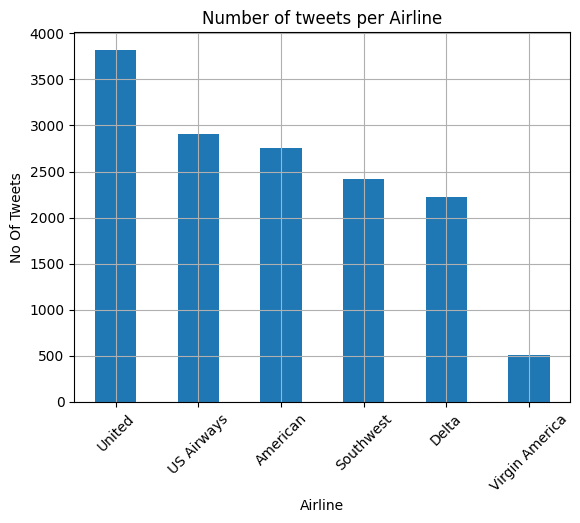

In [71]:
df['airline'].value_counts().plot(kind='bar')
plt.title("Number of tweets per Airline")
plt.ylabel("No Of Tweets")
plt.xlabel("Airline")
plt.xticks(rotation=45)
plt.grid(linestyle='-')
plt.show()

#What are the most common feelings among tweeters?

###Negative

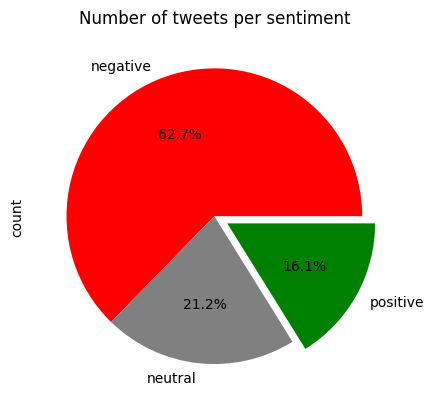

In [72]:
df['airline_sentiment'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=(0,0,0.1),colors=['red','gray','green'])
plt.title("Number of tweets per sentiment")
plt.show()

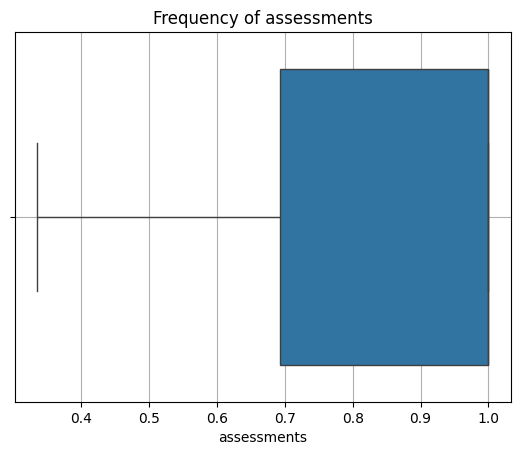

In [73]:
sns.boxplot(data=df,x="airline_sentiment_confidence")
plt.title("Frequency of assessments")
plt.xlabel("assessments")
plt.xticks(rotation=0)
plt.grid(linestyle='-')
plt.show()

#What is the most commonly used time zone?

###Eastern Time (US & Canada)

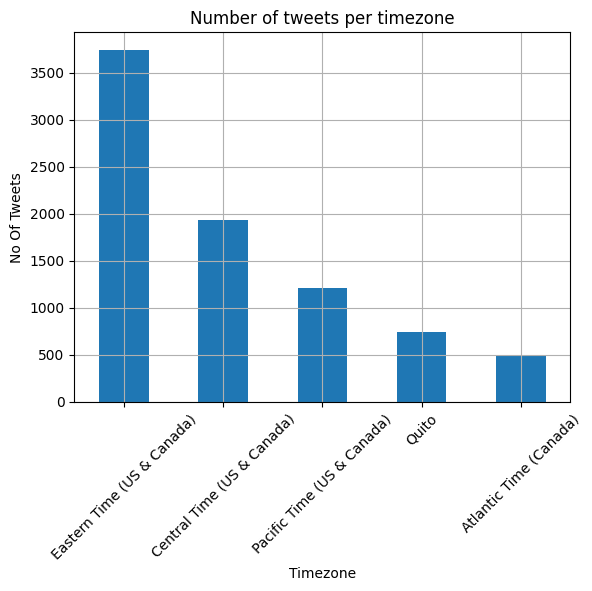

In [74]:
df['user_timezone'].value_counts().head(5).plot(kind='bar')
plt.title("Number of tweets per timezone")
plt.ylabel("No Of Tweets")
plt.xlabel("Timezone")
plt.xticks(rotation=45)
plt.grid(linestyle='-')
plt.show()

#What are the most common feelings for each airline?

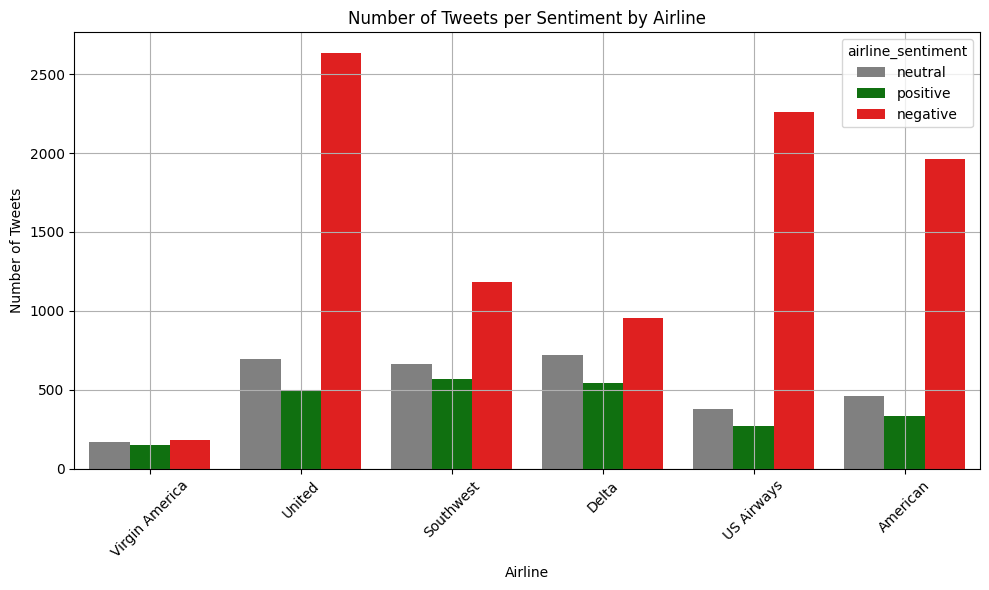

In [75]:
palette = {'negative': 'red','positive': 'green','neutral': 'gray'}
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='airline', hue='airline_sentiment', palette=palette)
plt.title("Number of Tweets per Sentiment by Airline")
plt.ylabel("Number of Tweets")
plt.xlabel("Airline")
plt.xticks(rotation=45)
plt.grid(linestyle='-')
plt.tight_layout()
plt.show()

#What is the number of tweets for the top 5 states?

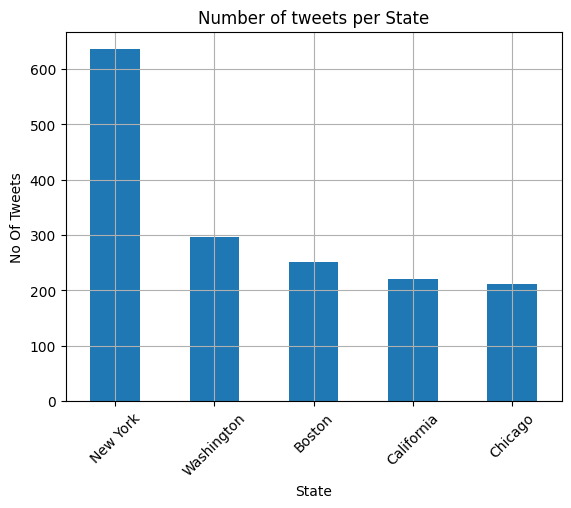

In [76]:
df['tweet_location_1'].value_counts().head(5).plot(kind='bar')
plt.title("Number of tweets per State")
plt.ylabel("No Of Tweets")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.grid(linestyle='-')
plt.show()

#Top 3 Negative Reasons per Airline

<ipython-input-77-475bb5eddc56>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top3 = grouped.groupby('airline').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)


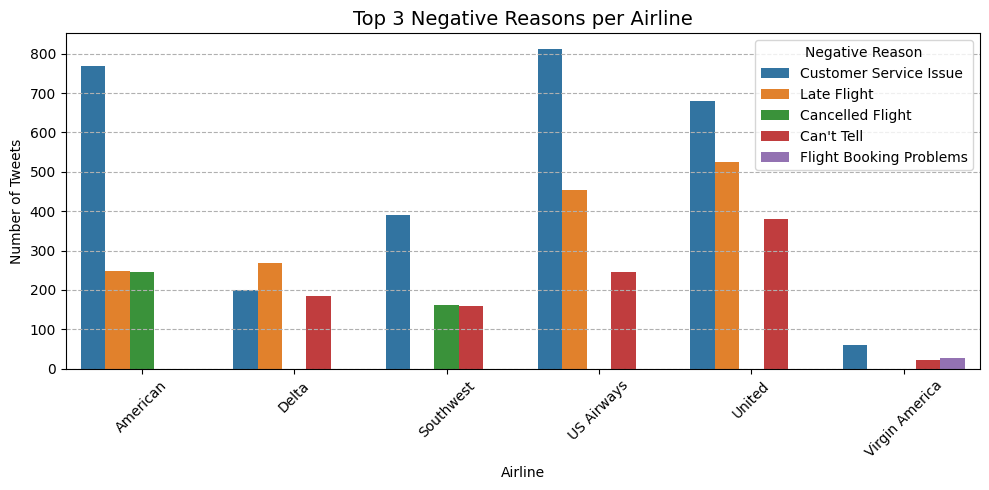

In [77]:
negative_df = df[df['airline_sentiment'] == 'negative']

grouped = negative_df.groupby(['airline', 'negativereason']).size().reset_index(name='count')

top3 = grouped.groupby('airline').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

plt.figure(figsize=(10, 5))
sns.barplot(data=top3, x='airline', y='count', hue='negativereason')

plt.title("Top 3 Negative Reasons per Airline", fontsize=14)
plt.ylabel("Number of Tweets")
plt.xlabel("Airline")
plt.xticks(rotation=45)
plt.legend(title="Negative Reason", loc='upper right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')
plt.show()

In [78]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(str(text))
    compound = score['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['vader_sentiment'] = df['text'].apply(get_sentiment)

print(df[['text', 'vader_sentiment']].head())

                                                text vader_sentiment
0                @VirginAmerica What @dhepburn said.         neutral
1  @VirginAmerica plus you've added commercials t...         neutral
2  @VirginAmerica I didn't today... Must mean I n...         neutral
3  @VirginAmerica it's really aggressive to blast...        negative
4  @VirginAmerica and it's a really big bad thing...        negative


In [79]:
comparison = pd.crosstab(df['airline_sentiment'], df['vader_sentiment'])
print(comparison)

vader_sentiment    negative  neutral  positive
airline_sentiment                             
negative               4033     1427      3718
neutral                 363      989      1747
positive                 68      145      2150


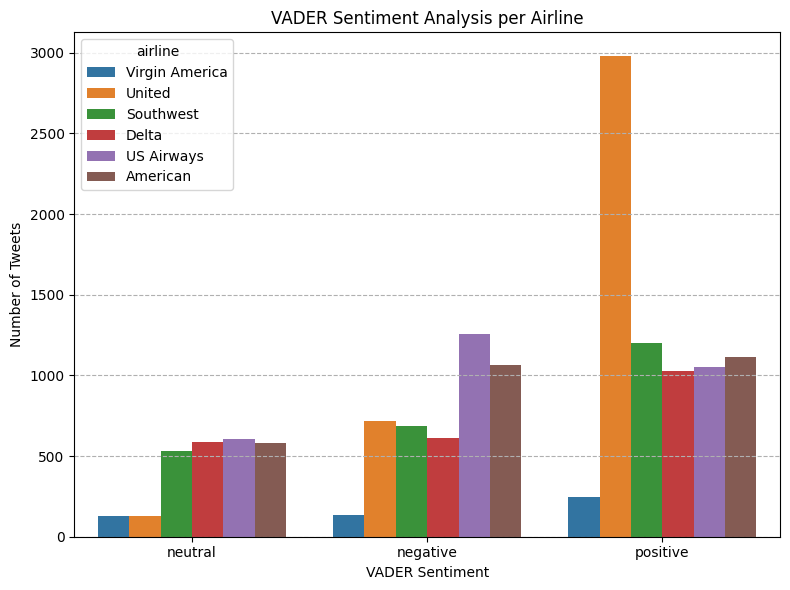

In [80]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='vader_sentiment', hue='airline')
plt.title("VADER Sentiment Analysis per Airline")
plt.xlabel("VADER Sentiment")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

 VADER Accuracy: 48.99%

 Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.44      0.59      9178
     neutral       0.39      0.32      0.35      3099
    positive       0.28      0.91      0.43      2363

    accuracy                           0.49     14640
   macro avg       0.52      0.56      0.46     14640
weighted avg       0.69      0.49      0.51     14640



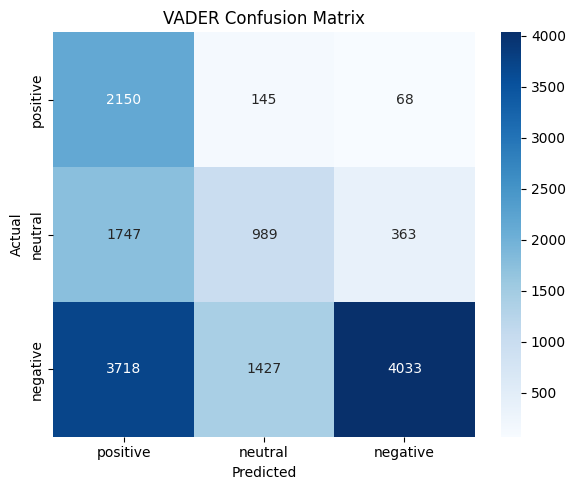

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

true_labels = df['airline_sentiment']
predicted_labels = df['vader_sentiment']

accuracy = accuracy_score(true_labels, predicted_labels)
print(f" VADER Accuracy: {accuracy:.2%}")

print("\n Classification Report:")
print(classification_report(true_labels, predicted_labels))

conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=['positive', 'neutral', 'negative'])

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['positive', 'neutral', 'negative'],
            yticklabels=['positive', 'neutral', 'negative'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("VADER Confusion Matrix")
plt.tight_layout()
plt.show()
